
Plotting Tilt EQ Frequency response
==================

After reading [this article by Francesco Baena](http://www.edn.com/design/analog/4368935/Implement-an-audio-frequency-tilt-equalizer-filter) I decided to try to plot the frequency response of the EQ section of the Diamond compressor.

Expected results
-----------------

First I calculated the expected results using the component values of the Diamond compressor.

Using the next formula we can calculate the pivot frequency $F_P$:

$$
F_P = \frac{\sqrt{P_1 + 2 \times R_F }}{2 \times \pi \times C \times \sqrt{R_F - R} \times \sqrt{P_1  \times \lgroup R + R_F \rgroup + 2 \times R \times R_F}}
$$

To calculate the maximum low-boost asymptote as $M_L$ (bass boost) and the maximum high-boost asymptote as $M_H$ (treble boost):

$$
M_L = \frac{P_1 + R_F}{R_F}
$$

$$
M_H = \frac{P_1 + R}{R \times M_L}
$$

In decibels:

$$
20 \times log(M_L) = 20 \times log( \frac{P_1 + R_F}{R_F})
$$

$$
20 \times log(M_H) = 20 \times log( \frac{P_1 + R}{R \times M_L})
$$

Using $R = 15 K \Omega , R_F = 47 K \Omega , C = 5.6 nF$:

$$
F_P = 879.73 Hz
$$

$$
20 \times log(M_L) = 6.30db
$$

$$
20 \times log(M_H) = 6.44db
$$

Circuit simulation
-------------------

Then I simulated the circuit in LTSpice. We get the expected frequency response.

LTSpice schematic:
![alt text](http://3.bp.blogspot.com/-eJ3VyWJd8a4/UfLYwxQAicI/AAAAAAAAAd8/LmNj-_g8ufA/s1600/tilt+eq+sch+sim+5.6nF.png "LTSpice schematic")

Frequency Response:
![alt text](http://1.bp.blogspot.com/-jhryi8_gGA8/UfLY_5hxo1I/AAAAAAAAAeE/Gu-cgFCJ8Vk/s1600/tilt+eq+5.6+nF.png "Frequency Response")

Plotting the transfer function
--------------------------------

At last I tried to plot the transfer function in python but we don't get the same result.

$$
\frac{V_O}{V_I} = \frac{X \times \lgroup Z - R_F \rgroup - Z \times \lgroup P_1 - R_F \rgroup}{X \times \lgroup Z - R_F \rgroup + R_F \times \lgroup Z + P_1 \rgroup}
$$

$$
Z = R + \frac{1}{i \times 2 \times \pi \times F \times C}
$$


Here is the code I use to plot the transfer function in Python:

Center Frequency (Hz): 897.738996208698
Bass boost (db): 6.293477526610548
Treble boost (db): 6.4429644251329385


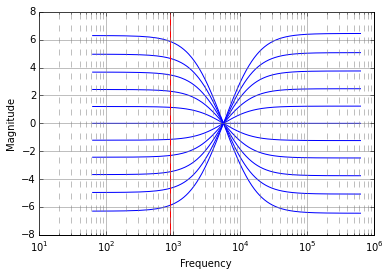

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
%matplotlib inline

R = 15.0 * 1000 # 15 Kohm
C = 0.0000000056 # 5.6 nF
Rf = 47.0 * 1000 # 47 Kohm

X = 0.0 # 0 Kohm
P1 = 50.0 * 1000.0 # 50 Kohm

f = np.arange(10, 10e4, 10) 
w = 2*math.pi*f
Z = R + ( 1 / (1j*w*C))



plt.figure()

for i in np.arange(0,55,5):
    X = i * 1000.0
    
    num = X*(Z-Rf) - Z*(P1+Rf)
    den = X*(Z-Rf) + Rf*(Z+P1)
    h = np.abs(num/den)
    hdb = 20 * np.log10(h)

    plt.semilogx(w, hdb, color="blue")    # Bode magnitude plot
    
    
plt.xlabel ("Frequency")
plt.ylabel ("Magnitude")
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='--')


Fp = math.sqrt(P1 + 2*Rf) / (2 * math.pi * C * math.sqrt(Rf-R) * math.sqrt(P1*(R+Rf) + 2*R*Rf))
ML = (P1 + Rf) / Rf
MH = (P1 + R) / (R * ML)

MLdb = 20 * math.log10(ML)
MHdb = 20 * math.log10(MH)

plt.axvline(Fp, color='red')

print "Center Frequency (Hz): " + `Fp`
print "Bass boost (db): " + `MLdb`
print "Treble boost (db): " + `MHdb`


As we can see the pivot frequency expected (vertical red line) and the actual pivot frequncy are not the same